#  Looking for Fraud 

This notebook uses credit card transactions dataset to look for fraud. 

In [1]:
import pandas as pd
import numpy as np

# https://www.kaggle.com/code/pierra/credit-card-dataset-svm-classification/input?select=creditcard.csv
df = pd.read_csv('./creditcard.csv.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## The Dataset
The credit card dataset is from *kaggle*. The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Note that the colums V1 to V28 are colums that are arrived after PCA has been performed on the original dataset. This is both for efficiency and privacy reasons. The only real data colums are Time and Amount. The class tells you weather the data is fraud (Class = 1) or not (Class = 0)

## EDA and preporcessing

In [2]:
print(f" No of fraud cases : {df[df['Class'] == 1].shape}")
print(f" No of non-fraud cases : {df[df['Class'] == 0].shape}")
print(f" Percent of frauld cases : {df[df['Class'] == 1].shape[0]/df[df['Class'] == 0].shape[0]*100}")

 No of fraud cases : (492, 31)
 No of non-fraud cases : (284315, 31)
 Percent of frauld cases : 0.17304750013189596


As seen above this is higly unbalanced dataset and any machile learning algorithm will perform exceptionally well by just marking everything 

as not-fraud. We can solve this by either oversamplling or undersampling. We try the undersampling approach.

In [2]:
import random
df_fraud = df[df['Class'] == 1]
df_nofraud = df[df['Class'] == 0]
df_sampled = df_nofraud.sample(400)
random.seed(42)
df_shuf = df.iloc[np.random.permutation(pd.concat((df_fraud, df_sampled)).index)].reset_index()
df_shuf.drop(['index'], axis=1, inplace=True)
df_shuf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,88672.0,-3.859881,2.632881,-5.264265,3.446113,-0.675231,-1.904959,-3.291041,-0.985766,-1.168114,...,1.664119,0.785075,0.068412,0.778961,-0.863166,-0.006810,-1.065734,1.773326,1.18,1
1,67150.0,-1.824295,0.403327,-1.994122,2.756558,-3.139064,0.408185,-1.209045,1.095634,-1.447225,...,0.838760,0.341727,0.947506,-0.145493,0.049326,0.831065,0.332421,0.252713,489.71,1
2,58222.0,-1.322789,1.552768,-2.276921,2.992117,-1.947064,-0.480288,-1.362388,0.953242,-2.329629,...,0.614969,-0.195200,0.590711,-0.233378,-0.164285,-0.277498,0.428610,0.246394,270.00,1
3,155542.0,1.868226,1.363077,-1.994934,4.173516,1.239751,-0.746186,0.572731,-0.131235,-1.551839,...,-0.301001,-0.818972,0.206812,-0.263683,-0.114958,-0.240672,-0.006629,0.017258,3.14,1
4,141236.0,0.008032,0.750098,0.130192,-0.794002,0.645495,-0.489640,0.878717,0.010075,-0.225209,...,-0.229650,-0.539110,0.033256,-0.483640,-0.490937,0.151731,0.241494,0.082352,8.90,0


  Lets plot the correlation between the colums. As see below the seems to be little correlation between the columns 

## Visualizing the Correlation

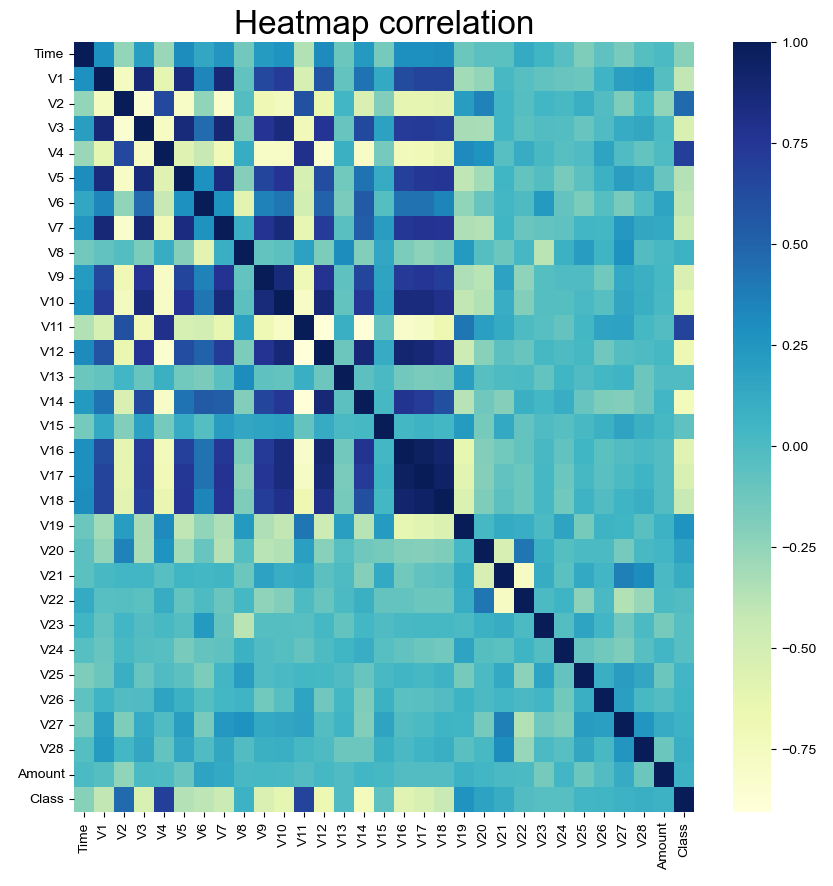

In [3]:
# Matplotlib library to plot the charts
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

# Library for the statistic data vizualisation
import seaborn

%matplotlib inline

df_corr = df_shuf.corr()
plt.figure(figsize=(10,10))
seaborn.heatmap(df_corr, cmap='YlGnBu') # Displaying the Heatmap
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()


As seen above there seems to be some correlation between variables, but removing them led to lower accuracy

In [4]:
from sklearn.model_selection import train_test_split

X = df_shuf.drop(['Class', 'Time'], axis=1)  # Time is not important
y = df_shuf['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print(f'X_train len = {X_train.shape}, X_test shape {X_test.shape}')


X_train len = (669, 29), X_test shape (223, 29)


## Logistic Regression
Lets create a baseline model with logistic regression. This will be the floor that we'll try to beat with SVM or other models.

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
# Preprocess to avoid scaling issues
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42)
clf_log = LogisticRegression(random_state=0).fit(X_train_scaled, y_train_scaled)
clf_log.score(X_test_scaled, y_test_scaled)

0.9327354260089686

We get an amazing 93% accuracy with the base model. Lets visualize the confusion matrix

### Confusion Matrix

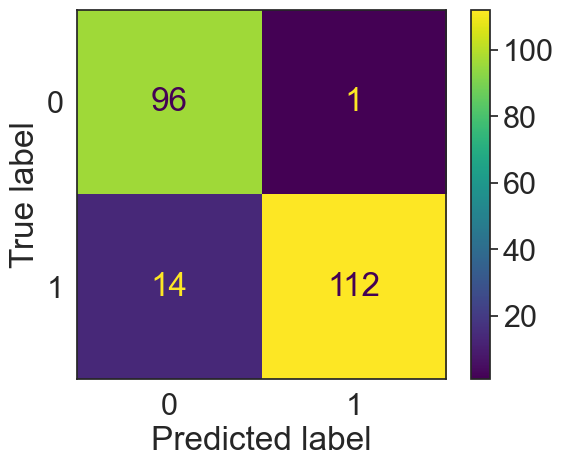

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = clf_log.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_hat, labels=clf_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf_log.classes_)
disp.plot()
plt.show()

## Trying out More complex models. 
### Linear SVC

In [57]:
from sklearn.svm import LinearSVC
clf_lsvc = LinearSVC(random_state=0).fit(X_train, y_train)
clf_lsvc.score(X_test, y_test)

0.9103139013452914

We don't see much of an improvement over the logistic regression case.
We can try the Grid Search Co-Validation with 10 folds for LinearSVC to see if we can do any better.
### Grid Search

In [60]:
from sklearn.model_selection import cross_val_score, GridSearchCV
grid=None # ToDo: replace it to proper GridSearchCV object and run the grid search with cross validation
C = list(range(1,10))
params = {'C':C}
# dual = False to avoid the warnings
grid = GridSearchCV(LinearSVC(dual=False), params, cv=10)
grid.fit(X, y)
print(grid.best_score_)
print(grid.best_params_)

0.9439450686641697
{'C': 7}


We got slightly better results with LinearSVC

### GridSearchCV with rbf

In [61]:
from sklearn.svm import SVC

values = [2**x for x in range(-5, 5)]
#params = {'kernel': [ 'linear', 'poly', 'rbf'], 'gamma': values, 'C':values}
params = {'kernel': [ 'rbf'], 'gamma': values, 'C':values}

grid = GridSearchCV(SVC(), params, cv=10)
grid.fit(X_scaled, y)
print(grid.best_score_)
print(grid.best_params_)

0.9350062421972535
{'C': 0.5, 'gamma': 0.0625, 'kernel': 'rbf'}


We don't do much better with a rbf kernel. Time to try something else
### Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
#clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5,
#    max_depth=3, random_state=0).fit(X_train, y_train)
params = {'max_depth': list(range(1,10)), 'learning_rate': list(np.arange(.1,1,.1)), 'n_estimators':list(range(100,300,100))}

grid = GridSearchCV(GradientBoostingClassifier(random_state=0), params, cv=3, verbose=True)
grid.fit(X,y)

print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
0.9405953645327246
{'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}


## KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
params = {'n_neighbors': list(range(1,10)), 'algorithm' : ('auto', 'ball_tree', 'kd_tree', 'brute'), 'weights': ('uniform', 'distance')}

grid = GridSearchCV(KNeighborsClassifier(), params, cv=3, verbose=True)
grid.fit(X, y)

print(grid.best_score_)
print(grid.best_params_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
0.896843151876709
{'algorithm': 'auto', 'n_neighbors': 8, 'weights': 'distance'}


## Conclusion

After trying on a bunch of simple to complex classifiers, We found that the LinearSVC had the best results, followed closely be LogisticRegression. Sometimes simplest models give you the best results.

As a final Act we test the logistic regression on the entire dataset. The results are pretty astounding !

In [65]:
clf_lsvc = SVC(kernel='linear', C=7).fit(X, y)
X_all = df.drop(['Time', 'Class'], axis=1)
#scaler = preprocessing.StandardScaler().fit(X_all)
#X_scaled_all = scaler.transform(X_all)
y_all = df['Class']
clf_lsvc.score(X_all, y_all)

0.958659723953414

In [66]:
from sklearn.metrics import classification_report
y_hat = clf_lsvc.predict(X_all)
print(classification_report(y_all, y_hat))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98    284315
           1       0.04      0.93      0.07       492

    accuracy                           0.96    284807
   macro avg       0.52      0.94      0.53    284807
weighted avg       1.00      0.96      0.98    284807



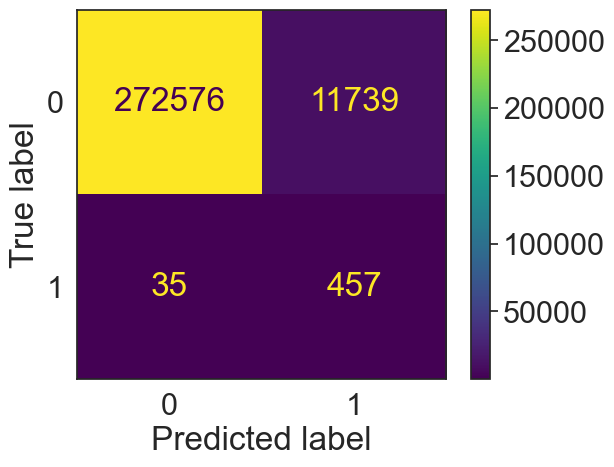

In [67]:
cm = confusion_matrix(y_all, y_hat, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()
plt.show()